In [1]:
import PIL
from PIL import Image
import numpy as np

In [2]:
im=Image.open('C:\\Users\\zhou\\Desktop\\test1.jpg')

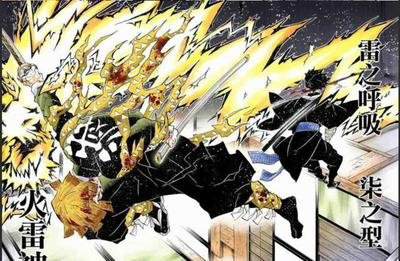

In [3]:
im

In [4]:
np.array(im).shape

(261, 400, 3)

In [5]:
print(im.size)
print(im.format)
print(im.mode)
print(im.palette)
print(im.info)

(400, 261)
JPEG
RGB
None
{'jfif': 257, 'jfif_version': (1, 1), 'dpi': (72, 72), 'jfif_unit': 1, 'jfif_density': (72, 72), 'progressive': 1, 'progression': 1}


In [6]:
im1=im

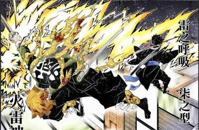

In [7]:
x,y=im1.size
im1.thumbnail((x/2,y/2))
im1

In [8]:
print(im1.size)

(199, 130)


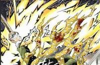

In [9]:
selected=(0,0,100,65)
im1_crop=im1.crop(selected)
im1_crop


In [10]:
im1_out=im1.resize((1000,500))

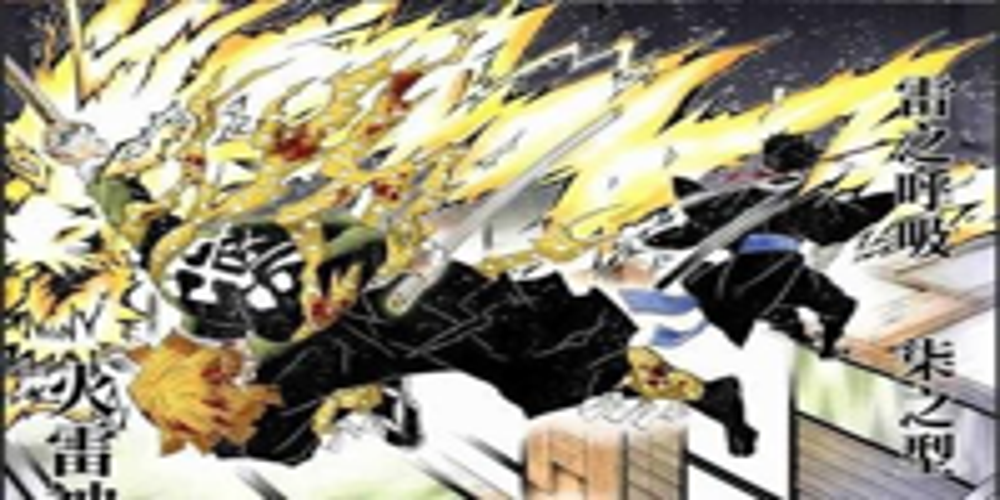

In [11]:
im1_out

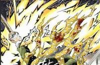

In [12]:
im1_crop

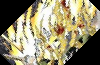

In [13]:
im1_crop.rotate(45)

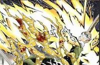

In [14]:
im1_crop.transpose(Image.FLIP_LEFT_RIGHT)

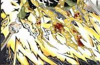

In [15]:
im1_crop.transpose(Image.FLIP_TOP_BOTTOM)

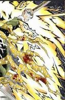

In [16]:
im1_crop.transpose(Image.ROTATE_270)

In [17]:
im1_gray=im1_crop.convert('L')

In [18]:
x,y=im1.size

In [19]:
lelf_size=(0,0,(x+1)//2,y)
right_size=((x)//2,0,x,y)
lelf=im1.crop(lelf_size)
right=im1.crop(right_size)

In [20]:
im1.paste(lelf,right_size)
im1.paste(right,lelf_size)

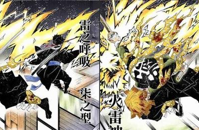

In [21]:
im1

In [22]:
im2=im

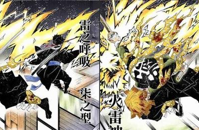

In [23]:
im2

In [24]:
w,h=im2.size

In [25]:
im2.paste((255,255,255),(w//4,h//4,3*w//4,3*h//4))

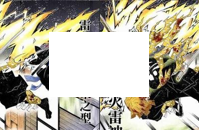

In [26]:
im2

In [27]:
im3=im

In [28]:
r,g,b=im3.split()

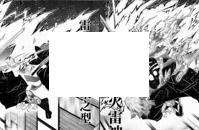

In [29]:
r

In [30]:
im3_plus=Image.merge('RGB',(g,b,r))

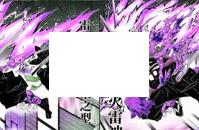

In [31]:
im3_plus

In [32]:
from PIL import ImageFilter

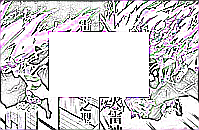

In [33]:
im3_plus.filter(ImageFilter.CONTOUR)

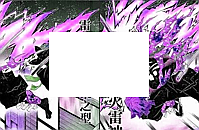

In [34]:
im3_plus.filter(ImageFilter.SHARPEN)

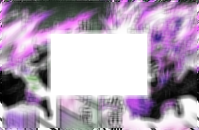

In [35]:
im3_plus.filter(ImageFilter.BLUR)

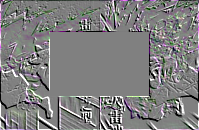

In [36]:
im3_plus.filter(ImageFilter.EMBOSS)

In [37]:
def deffun(c):
    return c*100000

In [38]:
im4=Image.eval(im3_plus,deffun)

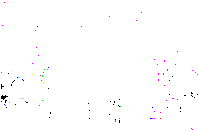

In [39]:
im4

In [40]:
np.array(im3).shape

(130, 199, 3)

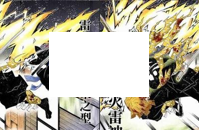

In [41]:
im3

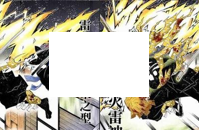

In [42]:
im

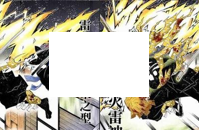

In [43]:
im

In [44]:
change=np.array([1,2,3,4,5,6,7,8,9,10]).reshape(5,2)

In [45]:
def zero_padding(nums,mat):
    m,n=mat.shape
    if m==n:
        mat=np.hstack((np.zeros((m,nums)),mat))
        m,n=mat.shape
        zero20=np.zeros((nums,n))
        mat=np.vstack((zero20,mat))
        return mat
    if m>n:
        zero11=np.zeros((m,m-n))
        mat=np.hstack((zero11,mat))
        m,n=mat.shape
        mat=np.hstack((np.zeros((m,nums)),mat))
        m,n=mat.shape
        zero21=np.zeros((nums,n))
        mat=np.vstack((zero21,mat))
        return mat
    if m<n:
        zero12=np.zeros((n-m,n))
        mat=np.vstack((zero12,mat))
        m,n=mat.shape
        mat=np.hstack((np.zeros((m,nums)),mat))
        m,n=mat.shape
        zero22=np.zeros((nums,n))
        mat=np.vstack((zero22,mat))
        return mat

In [113]:
def con(image,filter1,strde):
    r,g,b=image.split()
    list_pic=[r,g,b]
    list_pic_new=[]
    for image1 in list_pic:
        image1=np.array(image1)
        image1=zero_padding(0,image1)
        w,h=filter1.shape
        inw1,inh1=image1.shape
        nums=strde-((inw1-w)%strde)
        image1=zero_padding(nums,image1)
        inw,inh=image1.shape
        outw=int((inw-w)/strde+1)
        outh=int((inh-h)/strde+1)
        arr=np.zeros((outw,outh))
        for i in range(outw):
            for j in range(outh):
                arr[i,j]=sum(sum(image1[(strde*i):w+(strde*i),(strde*j):h+(strde*j)]*filter1))
        list_pic_new.append(arr)
    r1=Image.fromarray(list_pic_new[0]).convert('L')
    g1=Image.fromarray(list_pic_new[1]).convert('L')
    b1=Image.fromarray(list_pic_new[2]).convert('L')
    image=Image.merge('RGB',(r1,g1,b1))
    return image 

In [114]:
im=Image.open('C:\\Users\\zhou\\Desktop\\test1.jpg')

In [115]:
filter1=np.array([0,-1,0,-1,5,-1,0,-1,0]).reshape(3,3)

In [ ]:
#锐化处理

In [116]:
a=con(im,filter1,2)

In [ ]:
#模糊处理

In [118]:
filter2=(1/9)*np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)

In [119]:
b=con(im,filter2,2)

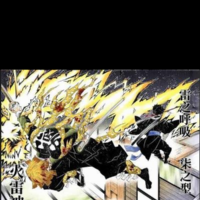

In [120]:
b

In [133]:
filter3=(1/16)*np.array([1,2,1,2,4,2,1,2,1]).reshape(3,3)

In [134]:
c=con(im,filter3,2)

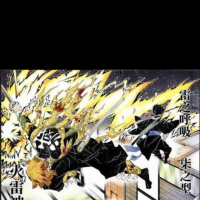

In [135]:
c